## Team ID : PNT2022TMID13268

### Visualizing And Analyzing The Data

#### Importing libraries

In [50]:
# importing libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , f1_score
from sklearn import svm

In [51]:
# To remove warnings
import warnings
warnings.filterwarnings('ignore')

#### Getting the dataset

#### Importing datasets

In [52]:
# Loading Dataset
df=pd.read_csv('loan_prediction.csv')

In [53]:
# First five rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
# find Type of Datas used in our project
type(df)

pandas.core.frame.DataFrame

In [55]:
# number of rows and columns
df.shape

(614, 13)

In [56]:
# Statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Finding Missing Data

In [57]:
# Handling Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [59]:
# Dropping missing values
df=df.dropna()

In [60]:
# Checking the missing values after dropping Null Values in Dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [61]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [63]:
# number of Values and what values are stored in specific column
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [64]:
# Replacing the value 3+ to 4 for easy Justification 
df=df.replace(to_replace='3+',value=4)

In [65]:
# Dependents value
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#### Data Visualization

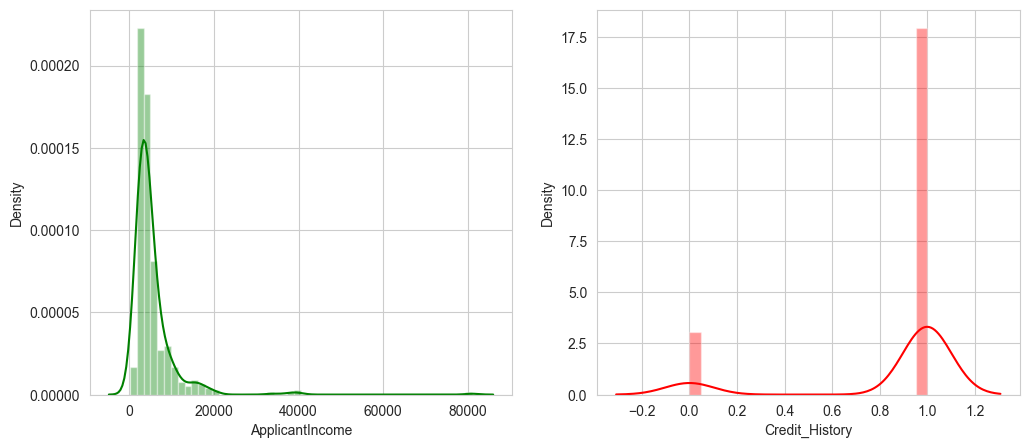

In [91]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'], color='g')
plt.subplot(122)
sns.distplot(df['Credit_History'],color='r')
plt.show()

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

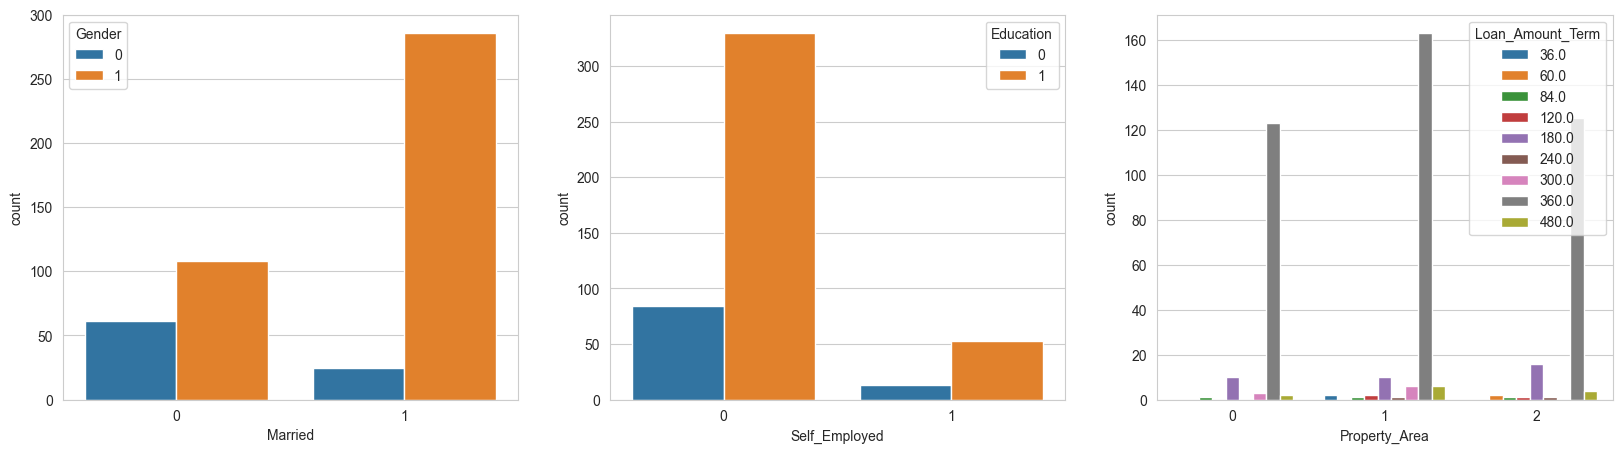

In [96]:
plt.figure(figsize=(20,5)) 
plt.subplot(131)
sns.countplot(x=df['Married'], hue=df['Gender'])
plt.subplot(132)
sns.countplot(x=df['Self_Employed'], hue=df['Education'])
plt.subplot(133)
sns.countplot(x=df['Property_Area'], hue=df['Loan_Amount_Term'])

<AxesSubplot: >

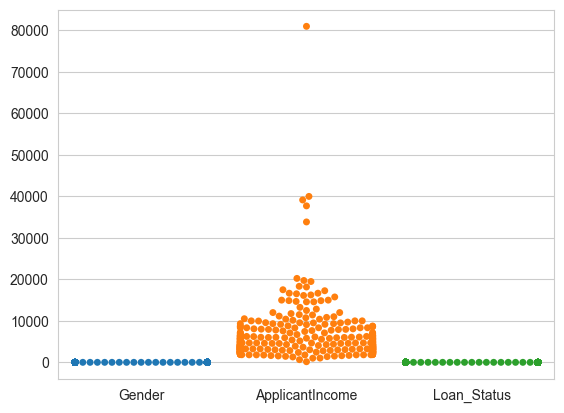

In [109]:
sns.swarmplot((df['Gender'], df['ApplicantIncome'], hue:=df['Loan_Status']))

<AxesSubplot: xlabel='Education', ylabel='count'>

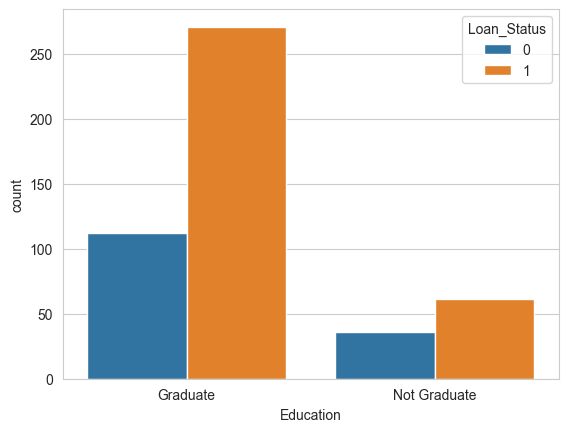

In [66]:
# Education and Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=df)

Text(0.5, 1.0, 'Scatter plot on Loan Status dataset')

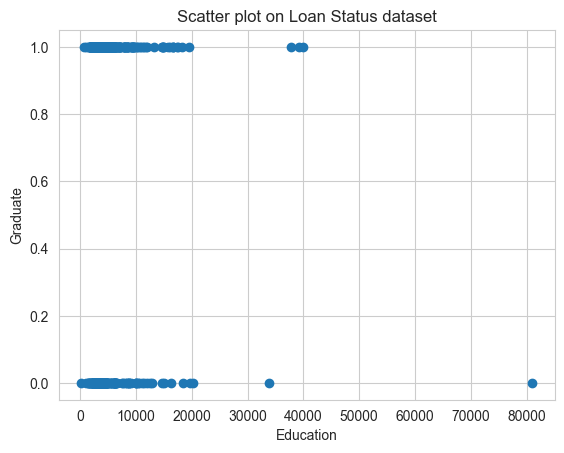

In [67]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
plt.xlabel('Education')
plt.ylabel('Graduate')
plt.title('Scatter plot on Loan Status dataset')

### Pair plot

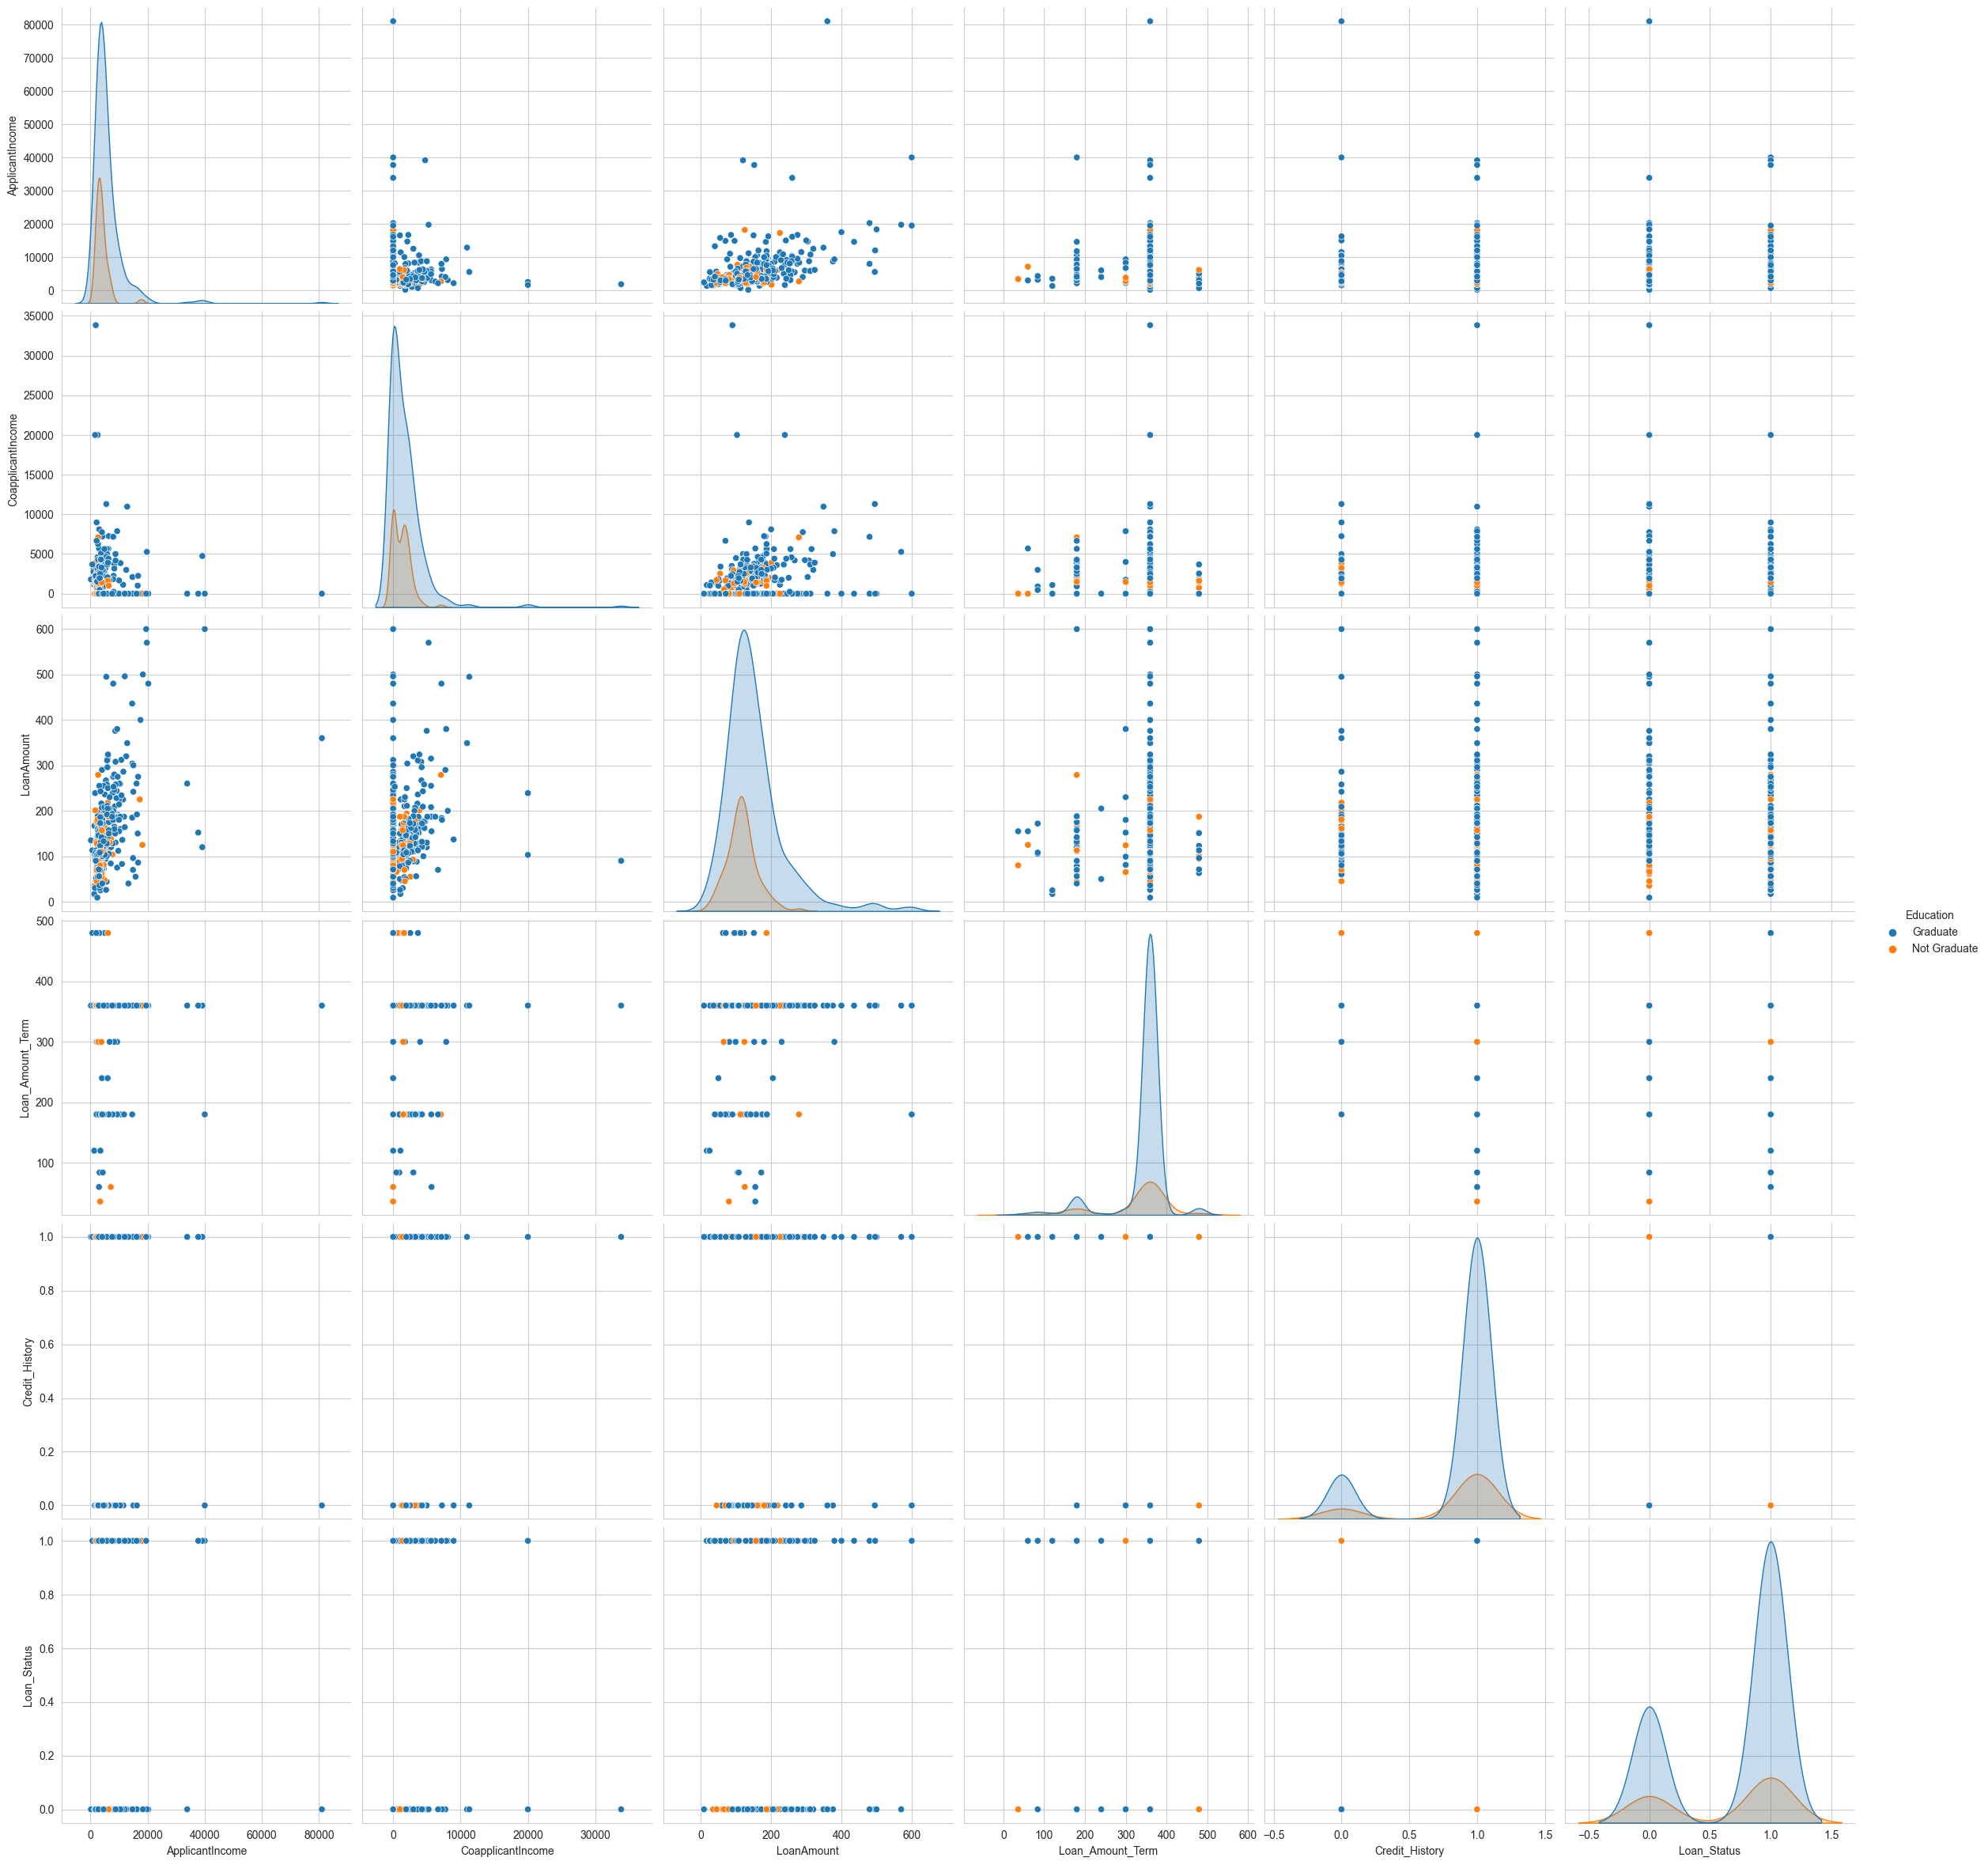

In [68]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Education", size=4);
plt.show()

### Box plots

<AxesSubplot: xlabel='Education', ylabel='ApplicantIncome'>

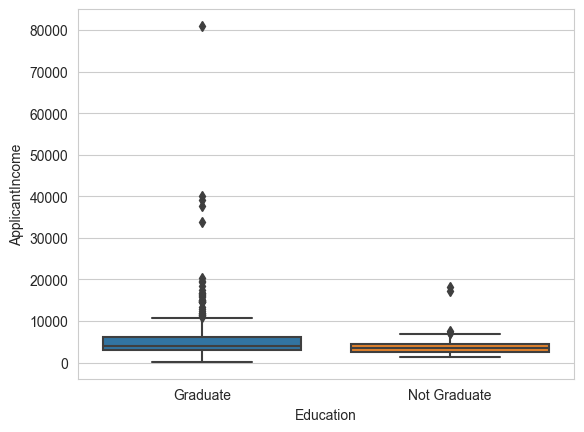

In [69]:
sns.boxplot(y='ApplicantIncome',x='Education',data=df)

<AxesSubplot: xlabel='Married', ylabel='count'>

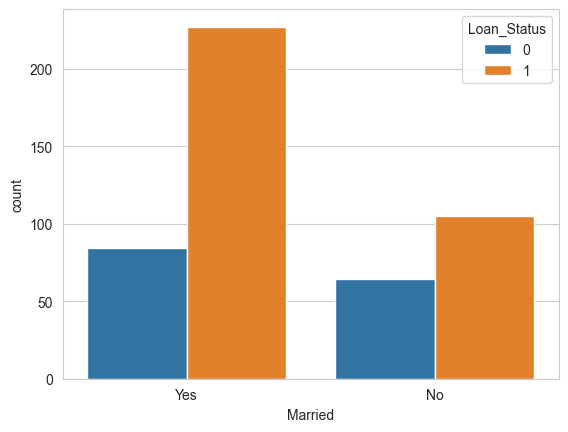

In [70]:
# Marital Status and Loan Status
sns.countplot(x="Married",hue='Loan_Status',data=df)

### Descriptive Analysis

In [110]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [72]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [74]:
# separating data and label
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [75]:
print(X.head())

   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  
1              0  
2              2  
3              2  
4              2  
5              2  


In [76]:
print(Y.head())

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64
